Wrapping the 2013 dataset data with `xarray`.

In [7]:
%matplotlib inline
%pylab inline
import collections, itertools, os
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [8]:
Recording = collections.namedtuple('Recording',['fn','df']) # filename and dataframe 
def load_data(dirpath):
    dfs = []
    for root, _, filenames in os.walk(dirpath):
        for filename in filenames:
            filepath = os.path.join(root,filename)
            nxt = pd.read_csv(filepath,index_col=0,compression='gzip')
            dfs.append(Recording(filename,nxt))
    return dfs

In [9]:
# load all files from data_clean directory into a list of DataFrames
data = load_data('../data_final')

In [10]:
#All data
coords_2013 = np.array([
    ['302', '303', '304', '305', '306', '307', '308', '309', '310', '312', '313', '314', '315', '316', '317', '318', '319', '320', '321', '322', '323', '324', '325', '326', '327', '328', '329', '330', '331'],
    ['332', '333', '334', '335', '336', '337', '338', '339', '340', '341', '342', '343', '344', '345', '346', '347', '348', '349', '350', '351', '352', '353', '354', '355', '356', '357', '358', '359', '360'],
    ['361', '362', '363', '364', '365', '366', '367', '368', '370', '372', '373', '374', '375', '376', '377', '378', '379', '380', '381', '382', '383', '384', '385', '386', '387', '388', '389', '390', '391'],
    ['392', '393', '394', '395', '396', '397', '398', '399', '400', '401', '402', '403', '404', '405', '406', '407', '408', '409', '410', '411', '412', '413', '414', '415', '416', '417', '418', '419', '420'],
    ['421', '422', '423', '424', '425', '426', '427', '428', '429', '430', '431', '432', '433', '434', '435', '436', '437', '438', '439', '440', '441', '442', '443', '444', '445', '446', '447', '448', '449'],
    ['450', '451', '452', '453', '454', '455', '456', '457', '458', '459', '460', '461', '462', '463', '464', '465', '466', '467', '468', '469', '470', '471', '472', '473', '474', '475', '476', '477', '478']
]).T
#Keep only first three weeks with complete data for each rat
coords_2013 = np.array([
    ['304', '305', '306', '307', '308', '309', '310', '312', '313', '314', '315', '316', '317', '318', '319', '320', '321', '322', '323', '324', '325', '326', '327', '328', '329', '330'],
    ['334', '335', '336', '337', '338', '339', '340', '341', '342', '343', '344', '345', '346', '347', '348', '349', '350', '351', '352', '353', '354', '355', '356', '357', '358', '359'],
    ['363', '364', '365', '366', '367', '368', '370', '372', '373', '374', '375', '376', '377', '378', '379', '380', '381', '382', '383', '384', '385', '386', '387', '388', '389', '390']
]).T

In [11]:
#Get 2013 data from data loaded
data_2013 = [rec for rec in data if '2013' in rec.fn]
#Prepare dimension labels
rats = ['28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54']
sessions = [f'week{i+1}' for i in range(3)]
times = pd.to_timedelta([t*40 for t in range(45001)],unit='ms')

In [94]:
r = []
for x in x_data:
    a = x.flatten()
    mask = np.concatenate(([False],np.isnan(a),[False]))
    if ~mask.any():
        r.append(0)
    else:
        idx = np.nonzero(mask[1:] != mask[:-1])[0]
        r.append((idx[1::2] - idx[::2]).max())
r.remove(6534)
max(r)

866

In [99]:
r

[2,
 125,
 19,
 0,
 12,
 187,
 43,
 0,
 227,
 197,
 150,
 31,
 322,
 121,
 7,
 191,
 3,
 169,
 84,
 72,
 2,
 34,
 16,
 21,
 1,
 0,
 1,
 33,
 0,
 34,
 4,
 288,
 37,
 5,
 199,
 13,
 207,
 35,
 66,
 161,
 32,
 22,
 105,
 1,
 19,
 166,
 232,
 1,
 2,
 4,
 18,
 137,
 94,
 2,
 30,
 182,
 15,
 2,
 172,
 866,
 23,
 111,
 143,
 5,
 226,
 129,
 4,
 53,
 93,
 32,
 322,
 44,
 25,
 150,
 3,
 84,
 75,
 10,
 34,
 76,
 100,
 5,
 183,
 26,
 64,
 135,
 107,
 168,
 44,
 23,
 294,
 205,
 24,
 4,
 83,
 1,
 87,
 3,
 20,
 1,
 142,
 0,
 0,
 72,
 37,
 3,
 320,
 2,
 29,
 17,
 0,
 89,
 130,
 261]

In [98]:
sum(np.isnan(y_data.flatten()))

56235

In [63]:

x_data = np.array([get_rec(session).df['X center (cm)'] for session in avail])
y_data = np.array([get_rec(session).df['Y center (cm)'] for session in avail])

In [12]:
def get_rec(session):
    return [rec for rec in data_2013 if rec.fn.split('_')[1].split('.')[0]==str(session)][0]

In [13]:
#load data for each feature (column)
x_data = np.array([[get_rec(session).df['X center (cm)'] for session in rat] for rat in coords_2013])
y_data = np.array([[get_rec(session).df['Y center (cm)'] for session in rat] for rat in coords_2013])
area_data = np.array([[get_rec(session).df['Area (cm²)'] for session in rat] for rat in coords_2013])
areachange_data = np.array([[get_rec(session).df['Areachange (cm²)'] for session in rat] for rat in coords_2013])
elongation_data = np.array([[get_rec(session).df['Elongation'] for session in rat] for rat in coords_2013])
direction_data = np.array([[get_rec(session).df['Direction (deg)'] for session in rat] for rat in coords_2013])
time_offset_data = np.array([[get_rec(session).df['Trial time (s)'][1] for session in rat] for rat in coords_2013])
#change order to a more logical one
treatment_data = ['qs']*6 + ['qm3']*7 + ['qm1']*8 + ['ss']*5

In [14]:
x = xr.DataArray(x_data, dims=['rat','session','time'], coords=[rats,sessions,times])
y = xr.DataArray(y_data, dims=['rat','session','time'], coords=[rats,sessions,times])
area = xr.DataArray(area_data, dims=['rat','session','time'], coords=[rats,sessions,times])
areachange = xr.DataArray(areachange_data, dims=['rat','session','time'], coords=[rats,sessions,times])
elongation = xr.DataArray(elongation_data, dims=['rat','session','time'], coords=[rats,sessions,times])
direction = xr.DataArray(direction_data, dims=['rat','session','time'], coords=[rats,sessions,times])
treatment = xr.DataArray(treatment_data, dims=['rat'], coords=[rats])
trial = xr.DataArray(coords_2013, dims=['rat','session'], coords=[rats,sessions])
time_offset = xr.DataArray(time_offset_data, dims=['rat','session'], coords=[rats,sessions])

In [15]:
data_vars = {'x': x, 'y': y, 'area': area, 'areachange': areachange, 'elongation': elongation, 'direction': direction, 'time_offset': time_offset}
coords = {'treatment': treatment, 'trial': trial}
attrs = {'dataset': '2013'}

ds = xr.Dataset(data_vars, coords, attrs)

# set treatment order
treatment_order = ['ss','qs','qm1','qm3']
treatment_index = sorted(ds.rat.values,key=lambda r: (treatment_order.index(ds.treatment.sel(rat=r)),r))
ds = ds.reindex(rat=treatment_index)

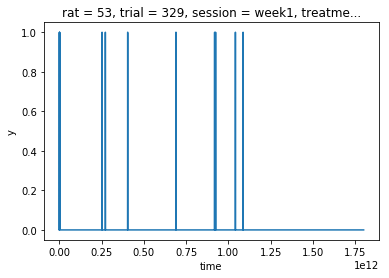

In [54]:
ds.isel(rat=3,session=0).isnull().y.plot()

In [16]:
#encoding = {var:{'zlib': True} for var in itertools.chain(ds.coords,ds.data_vars)}
#ds.to_netcdf('../xarray/2013.nc', encoding=encoding, engine='netcdf4', format='netCDF4')
import datasets
datasets.save(ds,'2013',overwrite=True)

In [11]:
#ds = xr.open_dataset('../xarray/2013.nc')

In [12]:
# Example usage
import datetime

In [13]:
# all sessions from week 1 for rats with treatment qns/saline
ds.sel(rat=ds.treatment=='qs', session='week1')

<xarray.Dataset>
Dimensions:      (rat: 6, time: 45001)
Coordinates:
  * rat          (rat) <U2 '28' '29' '30' '31' '32' '33'
    session      <U5 'week1'
  * time         (time) timedelta64[ns] 00:00:00 00:00:00.040000 ...
    treatment    (rat) <U3 'qs' 'qs' 'qs' 'qs' 'qs' 'qs'
    trial        (rat) <U3 '304' '305' '306' '307' '308' '309'
Data variables:
    x            (rat, time) float64 101.4 98.62 92.81 86.04 71.93 62.49 ...
    y            (rat, time) float64 10.81 7.634 8.795 9.383 5.508 4.686 ...
    area         (rat, time) float64 75.69 226.6 279.2 262.2 142.9 152.6 ...
    areachange   (rat, time) float64 nan 154.4 225.3 265.1 314.1 218.0 184.1 ...
    elongation   (rat, time) float64 0.4467 0.4351 0.359 0.7425 0.5876 ...
    direction    (rat, time) float64 -53.55 109.4 -72.12 7.891 36.87 -7.04 ...
    time_offset  (rat) float64 2.36 2.4 2.0 2.36 2.2 2.48
Attributes:
    dataset: 2013

In [14]:
# select rat with index 0
ds.isel(rat=0)

<xarray.Dataset>
Dimensions:      (session: 3, time: 45001)
Coordinates:
    rat          <U2 '50'
  * session      (session) <U5 'week1' 'week2' 'week3'
  * time         (time) timedelta64[ns] 00:00:00 00:00:00.040000 ...
    treatment    <U2 'ss'
    trial        (session) <U3 '326' '355' '386'
Data variables:
    x            (session, time) float64 96.12 96.48 97.23 100.6 100.8 99.87 ...
    y            (session, time) float64 -26.22 -27.0 -28.71 -11.28 -33.72 ...
    area         (session, time) float64 27.81 39.69 62.34 73.39 134.3 220.4 ...
    areachange   (session, time) float64 nan 12.98 26.7 135.7 207.7 354.6 ...
    elongation   (session, time) float64 0.1384 0.1729 0.4803 0.2726 0.7683 ...
    direction    (session, time) float64 135.0 135.0 118.1 46.63 -73.8 57.37 ...
    time_offset  (session) float64 2.48 2.76 0.04
Attributes:
    dataset: 2013

In [15]:
# select rats where x is ever greater than 104
ds.sel(rat=(ds.x > 104).any(dim=('session','time')))

/usr/lib/python3.6/site-packages/xarray/core/variable.py:1130: RuntimeWarning: invalid value encountered in greater
  if not reflexive


<xarray.Dataset>
Dimensions:      (rat: 9, session: 3, time: 45001)
Coordinates:
  * rat          (rat) <U2 '50' '53' '28' '29' '30' '33' '36' '37' '39'
  * session      (session) <U5 'week1' 'week2' 'week3'
  * time         (time) timedelta64[ns] 00:00:00 00:00:00.040000 ...
    treatment    (rat) <U3 'ss' 'ss' 'qs' 'qs' 'qs' 'qs' 'qm3' 'qm3' 'qm3'
    trial        (rat, session) <U3 '326' '355' '386' '329' '358' '389' ...
Data variables:
    x            (rat, session, time) float64 96.12 96.48 97.23 100.6 100.8 ...
    y            (rat, session, time) float64 -26.22 -27.0 -28.71 -11.28 ...
    area         (rat, session, time) float64 27.81 39.69 62.34 73.39 134.3 ...
    areachange   (rat, session, time) float64 nan 12.98 26.7 135.7 207.7 ...
    elongation   (rat, session, time) float64 0.1384 0.1729 0.4803 0.2726 ...
    direction    (rat, session, time) float64 135.0 135.0 118.1 46.63 -73.8 ...
    time_offset  (rat, session) float64 2.48 2.76 0.04 2.2 2.52 1.76 2.36 ...
Attrib

In [16]:
# select all datapoints between 1 and 2 minutes
ds.sel(time=slice(datetime.timedelta(minutes=1), datetime.timedelta(minutes=2)))

<xarray.Dataset>
Dimensions:      (rat: 26, session: 3, time: 1501)
Coordinates:
  * rat          (rat) <U2 '50' '51' '52' '53' '54' '28' '29' '30' '31' '32' ...
  * session      (session) <U5 'week1' 'week2' 'week3'
  * time         (time) timedelta64[ns] 00:01:00 00:01:00.040000 ...
    treatment    (rat) <U3 'ss' 'ss' 'ss' 'ss' 'ss' 'qs' 'qs' 'qs' 'qs' 'qs' ...
    trial        (rat, session) <U3 '326' '355' '386' '327' '356' '387' ...
Data variables:
    x            (rat, session, time) float64 -54.39 -52.83 -51.16 -49.25 ...
    y            (rat, session, time) float64 30.94 27.64 24.01 20.67 16.51 ...
    area         (rat, session, time) float64 116.9 118.4 126.8 121.6 121.6 ...
    areachange   (rat, session, time) float64 54.05 54.88 59.58 60.68 61.7 ...
    elongation   (rat, session, time) float64 0.7744 0.8001 0.8179 0.7925 ...
    direction    (rat, session, time) float64 -63.02 -64.11 -68.73 -64.8 ...
    time_offset  (rat, session) float64 2.48 2.76 0.04 2.68 3.04 2.2 

In [17]:
# select all datapoints within 10 cm of position (0,0) (manhattan distance)
d = 10
x1,y1,x2,y2 = -d,-d,d,d
mask = (x1<ds.x) & (ds.x<x2) & (y1<ds.y) & (ds.y<y2)
ds.sel(time=mask.any(dim=('rat','session')))
# to get same size ds but with all other values set to nan:
# ds.where(mask)

/usr/lib/python3.6/site-packages/xarray/core/variable.py:1130: RuntimeWarning: invalid value encountered in greater
  if not reflexive
/usr/lib/python3.6/site-packages/xarray/core/variable.py:1130: RuntimeWarning: invalid value encountered in less
  if not reflexive


<xarray.Dataset>
Dimensions:      (rat: 26, session: 3, time: 643)
Coordinates:
  * rat          (rat) <U2 '50' '51' '52' '53' '54' '28' '29' '30' '31' '32' ...
  * session      (session) <U5 'week1' 'week2' 'week3'
  * time         (time) timedelta64[ns] 00:00:01.280000 00:00:01.320000 ...
    treatment    (rat) <U3 'ss' 'ss' 'ss' 'ss' 'ss' 'qs' 'qs' 'qs' 'qs' 'qs' ...
    trial        (rat, session) <U3 '326' '355' '386' '327' '356' '387' ...
Data variables:
    x            (rat, session, time) float64 74.79 88.4 99.55 99.71 100.4 ...
    y            (rat, session, time) float64 -29.49 -35.04 -14.87 4.441 ...
    area         (rat, session, time) float64 127.7 151.9 213.0 116.9 104.6 ...
    areachange   (rat, session, time) float64 234.6 279.7 364.9 329.9 30.85 ...
    elongation   (rat, session, time) float64 0.4485 0.4048 0.4097 0.1132 ...
    direction    (rat, session, time) float64 31.58 -53.42 -48.26 -43.08 ...
    time_offset  (rat, session) float64 2.48 2.76 0.04 2.68 3.04

In [18]:
# rolling window over direction of certain trial
trial = ds.isel(rat=0,session=0)
r = trial.direction.rolling(time=25,center=True).mean()
speed = np.sqrt(trial.x.diff('time')**2 + trial.y.diff('time')**2)/0.04
#speed[r.isnull()] = np.nan

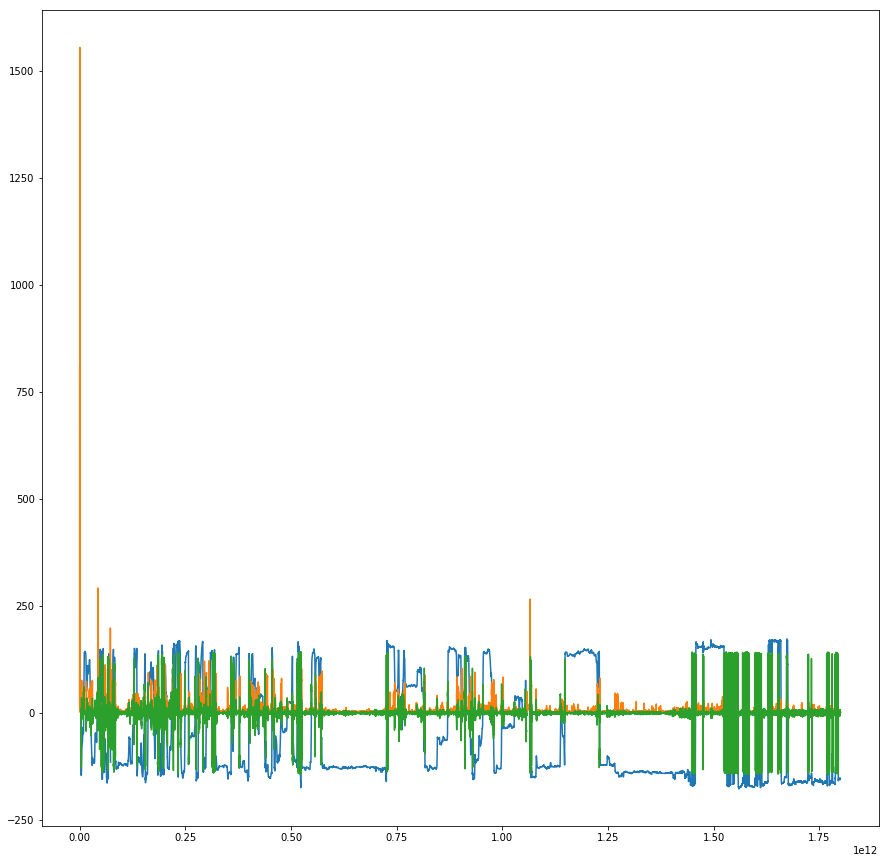

In [19]:
pylab.rcParams['figure.figsize'] = (15,15)
plt.plot(r.time,r.values)
plt.plot(speed.time,speed.values)
plt.plot(speed.time,pd.Series(r.values).diff()[1:]*10)

In [20]:
pd.Series(speed.values).corr(pd.Series(r.values).diff())

-0.045603520984669341